# LECTURA DE ARCHIVOS

In [26]:
import pandas as pd

# Cargar el archivo Excel de entrenamiento
df_train = pd.read_excel('/kaggle/input/semana-de-ingenieria-udep-2025/train.xlsx')

print(df_train.head())
print(df_train.shape)


   id Product_Type  Air_temperature  Process_temperature  Rotational_speed  \
0  88            M       302.400000           310.100000        1358.00000   
1  89            M       297.800000           307.600000        1352.00000   
2  90            L       299.300000           309.100000        1293.00000   
3  91            L       300.662042           311.928775        1524.41103   
4  92            L       301.700000           309.900000        1317.00000   

      Torque  Last_maintenance_days Operator_ID Lubricant_Type      Shift  \
0  54.600000                    138       OP_09         Type_A  Afternoon   
1  49.400000                      7       OP_03         Type_A    Morning   
2  53.700000                     62       OP_05         Type_A  Afternoon   
3  38.664034                     23       OP_05         Type_A  Afternoon   
4  49.000000                    125       OP_04         Type_B      Night   

   Ambient_Humidity  target_feature  
0              63.1       61.0

# ANALISIS DESCRIPTIVO

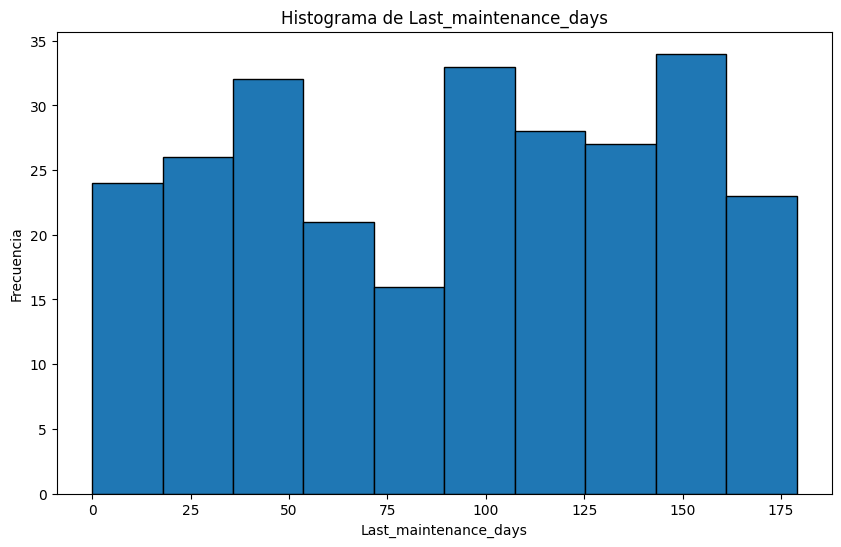

In [12]:
# Generar histograma de una variable

import matplotlib.pyplot as plt

# Seleccionar la variable para el histograma
variable = 'Last_maintenance_days'

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(df_train[variable], bins=10, edgecolor='black')
plt.title(f'Histograma de {variable}')
plt.xlabel(variable)
plt.ylabel('Frecuencia')
plt.show()


# PREPARACION DE DATOS

In [13]:
# Separate features and target variable
X = df_train.drop('target_feature', axis=1)
y = df_train['target_feature']



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones del conjunto de entrenamiento X:", X_train.shape)
print("Dimensiones del conjunto de prueba X:", X_test.shape)
print("Dimensiones del conjunto de entrenamiento y:", y_train.shape)
print("Dimensiones del conjunto de prueba y:", y_test.shape)

Dimensiones del conjunto de entrenamiento X: (211, 11)
Dimensiones del conjunto de prueba X: (53, 11)
Dimensiones del conjunto de entrenamiento y: (211,)
Dimensiones del conjunto de prueba y: (53,)


# MODELO KNN

In [15]:
print(X_train.head())
print("----------")
print(y_train.head())

      id Product_Type  Air_temperature  Process_temperature  Rotational_speed  \
144  232            M       299.769681           311.319357       1692.579298   
73   161            M       298.100000           308.900000       1417.000000   
78   166            L       301.600000           310.100000       1362.000000   
252  340            L       302.000000           310.400000       1357.000000   
182  270            M       302.200000           310.600000       1346.000000   

        Torque  Last_maintenance_days Operator_ID Lubricant_Type    Shift  \
144  30.157329                     57       OP_05         Type_C  Morning   
73   39.200000                     34       OP_02         Type_C  Morning   
78   55.800000                    171       OP_09         Type_C    Night   
252  58.000000                    120       OP_04         Type_B    Night   
182  49.200000                    112       OP_09         Type_C  Morning   

     Ambient_Humidity  
144              46.9  
73

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores hiperparámetros: {'model__n_neighbors': 9, 'model__p': 2, 'model__weights': 'uniform'}
MSE en test: 6029.02911213985


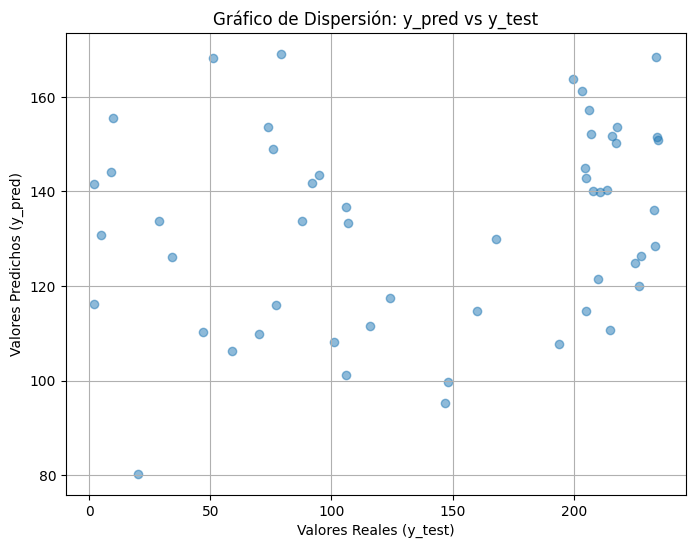

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# 3. Separar variables numéricas y categóricas
num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# 4. Preprocesamiento
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# 5. Pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", KNeighborsRegressor())
])

# 6. Grid de búsqueda
param_grid = {
    "model__n_neighbors": [3, 5, 7, 9],
    "model__weights": ["uniform", "distance"],
    "model__p": [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

# 7. Grid search con validación cruzada
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",  # o "r2", "neg_mean_absolute_error"
    n_jobs=-1,
    verbose=1
)

# 8. Entrenamiento
grid_search.fit(X_train, y_train)

# 9. Evaluación
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("MSE en test:",mse)

# prompt: grafico de dispersion entre y_pred y y_test

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Gráfico de Dispersión: y_pred vs y_test')
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Valores Predichos (y_pred)')
plt.grid(True)
plt.show()


# GENERAR EL ARCHIVO DE ENVIO

In [17]:
# Cargar el archivo Excel
df_test=pd.read_excel("/kaggle/input/semana-de-ingenieria-udep-2025/test.xlsx")

In [18]:
#Generar predicción
y_results = best_model.predict(df_test)

In [19]:
# generar un archivo csv llamado sample_submission que tenga el id y la prediccion del "target feature" del df_test

import pandas as pd
# Generate sample submission file
submission = pd.DataFrame({'id': df_test['id'], 'target_feature': y_results})

# Save the submission file
submission.to_csv('sample_submission.csv', index=False)

print("Sample submission file 'sample_submission.csv' created successfully.")
print(submission.head())

Sample submission file 'sample_submission.csv' created successfully.
   id  target_feature
0   0      121.480160
1   1       83.666667
2   2      152.333333
3   3      120.444444
4   4      147.508215
